In [1]:
import numpy as np
from astropy.io import ascii
import pandas as pd
import matplotlib.pyplot as plt
import pystan as ps
import arviz as av
import seaborn as sns
import pickle
import astropy.units as u
import astropy.constants as const

%matplotlib inline

In [2]:
#simulate position and velocity (magnitude) values

pos = np.absolute(np.random.normal(0,50,size=400))
vel = np.absolute(np.random.normal(0,300,size=400))

In [3]:
# get rid of any gc's that aren't bound, assuming mass of 10^12.5
G = 4.3009173*1e-6
M = 10**(12.5)

msk = []
for i in range(len(pos)):
    escvel = np.sqrt(2*G*M/pos[i])
    if vel[i] < escvel:
        msk.append(True)
    elif vel[i] > escvel:
        msk.append(False)

In [4]:
sim_pos = pos[msk]
sim_vel = vel[msk]

In [5]:
simstandata = {
    'N': len(sim_pos),

    'r_obs': sim_pos,
    'rv_obs': sim_vel,
}

In [28]:
with open('simulated_data.stan', 'r') as f:
    stancode = f.read()
    
sm = ps.StanModel(model_code=stancode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ec094e1ad4409e8cb161fe7b3e9586b8 NOW.


In [29]:
def initial_values():
    return {
        'logM': 12.8,
        'loga': 1.5,
    }

In [30]:
fit = sm.sampling(data=simstandata,
                  init=initial_values,
                  n_jobs = 1,
                  iter=2000, 
                  #chains=1, #1 for diagnostics
                  #control = adapt, 
                  verbose=True
                 )

In [31]:
print(fit.stansummary())

Inference for Stan model: anon_model_ec094e1ad4409e8cb161fe7b3e9586b8.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
logM  13.03    0.02   0.23  12.64  12.85  13.01  13.21  13.47    150   1.01
loga   1.43    0.02    0.3   1.02   1.18   1.38   1.63   2.09    226   1.01
lp__  -1.52     0.1   1.18  -4.83  -1.98  -1.14  -0.68  -0.38    130   1.01

Samples were drawn using NUTS at Fri Feb 19 13:49:34 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


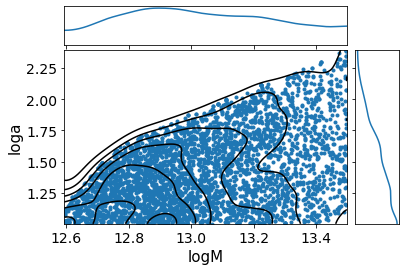

In [32]:
av.plot_pair(fit, kind=['kde', 'scatter'], marginals=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8a3ef6d00>,
      dtype=object)

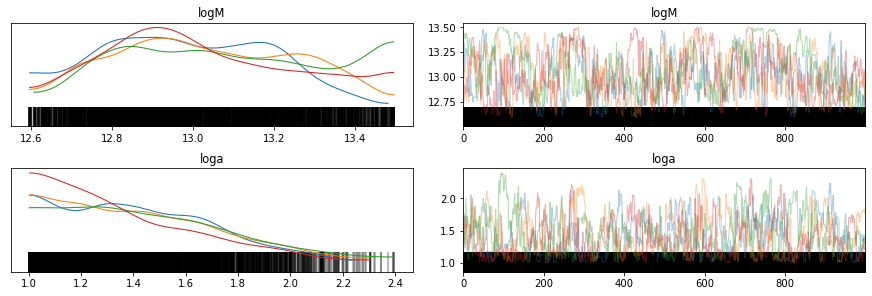

In [33]:
av.plot_trace(fit)